In [1]:
from ipywidgets import widgets, interact
import os
import random
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time
import glob

In [2]:
user = 'chris'

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var command = ["currenturl = ", "'", window.location.href, "'" ].join('')
kernel.execute(command)

<IPython.core.display.Javascript object>

In [4]:
from urllib.parse import urlparse
o = urlparse(currenturl)
hostname = o.hostname

In [5]:
cifarpath = os.path.join('cifar-10', "*.bin")
size           = 32
color_channels = 3
image_size     = size * size * color_channels
label_size     = 1
raw_size       = image_size + label_size
inputraw       = []
labelsraw      = []
for cifarbinname in glob.glob(cifarpath):
    with open(cifarbinname, 'rb') as cifarfile:
        raw = cifarfile.read()
        n_images = len(raw) // raw_size
        offset = 0
        for i in range(n_images):
            single = np.frombuffer(raw, dtype=np.uint8, count=image_size, offset=offset + label_size)
            labelsraw.append(raw[offset])
            inputraw.append(single)
            offset += raw_size
print("TOTAL {} images".format(len(inputraw)))
images = np.stack(inputraw, axis = 0).reshape([-1, color_channels, size, size])
labels = np.array(labelsraw, dtype=np.int32)
with open(os.path.join('cifar-10', 'batches.meta.txt'), 'r') as metafile:
    lines = metafile.readlines();
label_text = [x.strip() for x in lines]
nlabels = len(label_text)
nimages = images.shape[0]

TOTAL 60000 images


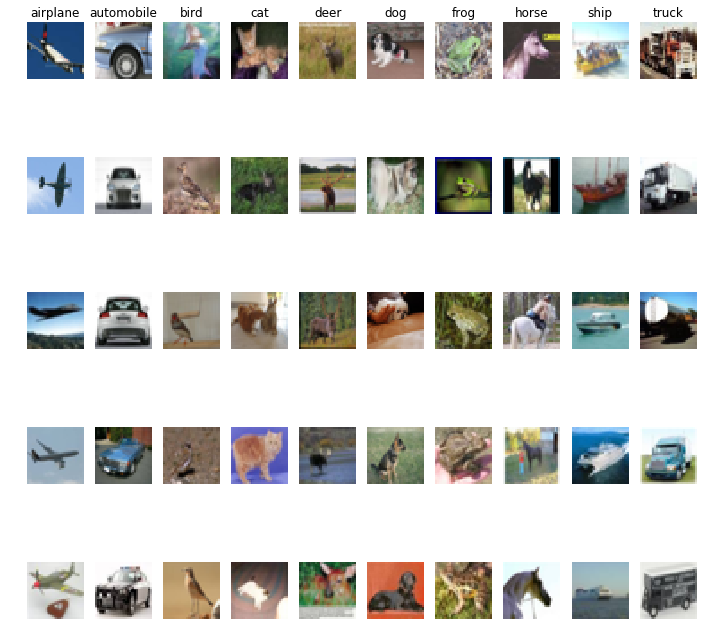

In [6]:
images_reshaped = images.transpose([0,2,3,1])
sort_index = np.argsort(labels)
images_sorted = images_reshaped[sort_index]
labels_sorted = labels[sort_index]
plt.figure(figsize=(12,12))
images_per_category = nimages // nlabels

samples = 5
for i in range(nlabels):
    for j in range(samples):
        index = random.randint(0, images_per_category - 1)
        plt.subplot(samples, nlabels, j * nlabels + i + 1)
        plt.axis('off')
        plt.xlabel("")
        plt.ylabel("")
        plt.imshow(images_sorted[i * images_per_category + index], interpolation='nearest')
        if (j == 0):
            plt.title(label_text[labels_sorted[i * images_per_category + index]])
plt.show()

In [7]:
def shuffle_images(images, labels):
    x = list(range(images_reshaped.shape[0]))
    random.shuffle(x)
    return images_reshaped[x], labels[x]
images, lables = shuffle_images(images_reshaped, labels)

In [10]:
train2test_ratio = 6
test_size  = images.shape[0] // train2test_ratio
train_size = nimages - test_size
train_images, test_images = np.split(images, [train_size])
train_labels, test_labels = np.split(labels, [train_size])
print("train_images shape = {} train_labels shape = {} test_images shape = {} test_labels shape = {}".format(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape))

train_images shape = (50000, 32, 32, 3) train_labels shape = (50000,) test_images shape = (10000, 32, 32, 3) test_labels shape = (10000,)


In [ ]:
from IPython.display import display, HTML
url = "<iframe src=http://" + hostname + ":8080/?user=" + user + " width=700 height=500></iframe>"
HTML(url)

In [ ]:
modelfile = os.path.join('model', user + '.py')

In [ ]:
%load $modelfile